In [1]:
import pandas as pd
import numpy as np

In [2]:
import altair as alt # Python wrapper for Vega-Lite visualisation grammar

In [3]:
from os.path import join

In [4]:
DATA_DIR = "../exp_results/output/"

In [5]:
proj_imports2 = pd.read_csv(join(DATA_DIR, "results_imports_python2.csv"))
proj_imports2

,repo,path,module_name,import_name,parse_error
0,72225778,72225778/predict.py,predict,data_helper,False
1,72225778,72225778/predict.py,predict,json,False
2,72225778,72225778/predict.py,predict,logging,False
3,72225778,72225778/predict.py,predict,numpy,False
4,72225778,72225778/predict.py,predict,os,False
...,...,...,...,...,...
44211,40576835,40576835/api_benchmarks.py,api_benchmarks,settings,False
44212,40576835,40576835/api_benchmarks.py,api_benchmarks,time,False
44213,40576835,40576835/api_benchmarks.py,api_benchmarks,urllib,False
44214,40576835,40576835/api_benchmarks.py,api_benchmarks,urllib2,False


In [6]:
proj_imports2.nunique()

repo             222
path            7941
module_name     6635
import_name    10903
parse_error        2
dtype: int64

In [7]:
proj_imports3 = pd.read_csv(join(DATA_DIR, "results_imports_python3.csv"))
proj_imports3

,repo,path,module_name,import_name,parse_error
0,72225778,72225778/predict.py,predict,data_helper,False
1,72225778,72225778/predict.py,predict,json,False
2,72225778,72225778/predict.py,predict,logging,False
3,72225778,72225778/predict.py,predict,numpy,False
4,72225778,72225778/predict.py,predict,os,False
...,...,...,...,...,...
43599,88318858,88318858/batchgen.py,NaN,NaN,True
43600,88318858,88318858/train.py,NaN,NaN,True
43601,40576835,40576835/get_accuracies.py,NaN,NaN,True
43602,40576835,40576835/api_benchmarks.py,NaN,NaN,True


In [8]:
proj_imports3.nunique()

repo             222
path            7941
module_name     6427
import_name    10460
parse_error        2
dtype: int64

In [9]:
proj_imports_all = pd.concat([proj_imports2, proj_imports3], ignore_index=True)

In [10]:
proj_imports_all

,repo,path,module_name,import_name,parse_error
0,72225778,72225778/predict.py,predict,data_helper,False
1,72225778,72225778/predict.py,predict,json,False
2,72225778,72225778/predict.py,predict,logging,False
3,72225778,72225778/predict.py,predict,numpy,False
4,72225778,72225778/predict.py,predict,os,False
...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True
87816,88318858,88318858/train.py,NaN,NaN,True
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True


In [11]:
proj_imports_all["module_short_name"] = proj_imports_all["import_name"].apply(lambda x: x.split(".")[0] if not(pd.isna(x)) else "") 

In [12]:
proj_imports_all

,repo,path,module_name,import_name,parse_error,module_short_name
0,72225778,72225778/predict.py,predict,data_helper,False,data_helper
1,72225778,72225778/predict.py,predict,json,False,json
2,72225778,72225778/predict.py,predict,logging,False,logging
3,72225778,72225778/predict.py,predict,numpy,False,numpy
4,72225778,72225778/predict.py,predict,os,False,os
...,...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True,
87816,88318858,88318858/train.py,NaN,NaN,True,
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True,
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True,


In [13]:
# TODO: More systematic treatment of NaN values # DONE (NaNs are now used instead of "" other than for module_short_name)
# proj_imports_all = proj_imports_all.fillna("")

In [14]:
proj_imports_all

,repo,path,module_name,import_name,parse_error,module_short_name
0,72225778,72225778/predict.py,predict,data_helper,False,data_helper
1,72225778,72225778/predict.py,predict,json,False,json
2,72225778,72225778/predict.py,predict,logging,False,logging
3,72225778,72225778/predict.py,predict,numpy,False,numpy
4,72225778,72225778/predict.py,predict,os,False,os
...,...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True,
87816,88318858,88318858/train.py,NaN,NaN,True,
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True,
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True,


In [15]:
proj_imports_all["module_name"].unique()

array(['predict', 'text_cnn_rnn', 'data_helper', ...,
       'pythainlp.soundex.metasound', 'pythainlp.soundex.__init__',
       'crawler.reuters'], dtype=object)

In [16]:
annotated_libs = pd.read_csv("popular_manually_annotated_v2_export.csv")

In [17]:
annotated_libs

,module_short_name,repo,cat,isML,comments
0,os,178,NaN,NaN,NaN
1,sys,162,NaN,NaN,NaN
2,re,148,NaN,NaN,NaN
3,numpy,122,STAT,NaN,NaN
4,collections,117,NaN,NaN,NaN
...,...,...,...,...,...
1393,parsimonious,1,NaN,NaN,NaN
1394,parsing_cust_review,1,NaN,NaN,NaN
1395,part11probing,1,NaN,NaN,NaN
1396,pcen,1,NaN,NaN,NaN


In [18]:
# list of ML related libraries imported by 2 or more projects
ml_libs = list(annotated_libs[annotated_libs["isML"] == "Y"]["module_short_name"])
ml_libs

['sklearn',
 'tensorflow',
 'keras',
 'torch',
 'theano',
 'pyspark',
 'tflearn',
 'pytorch_pretrained_bert',
 'xgboost',
 'apex']

In [19]:
import import_graph

In [20]:
proj_imports_all

,repo,path,module_name,import_name,parse_error,module_short_name
0,72225778,72225778/predict.py,predict,data_helper,False,data_helper
1,72225778,72225778/predict.py,predict,json,False,json
2,72225778,72225778/predict.py,predict,logging,False,logging
3,72225778,72225778/predict.py,predict,numpy,False,numpy
4,72225778,72225778/predict.py,predict,os,False,os
...,...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True,
87816,88318858,88318858/train.py,NaN,NaN,True,
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True,
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True,


In [21]:
proj_imports_test = proj_imports_all[proj_imports_all["path"].str.contains("test") | proj_imports_all["import_name"].str.contains("test")]

In [22]:
proj_imports_test

,repo,path,module_name,import_name,parse_error,module_short_name
34,72225778,72225778/train.py,train,sklearn.model_selection.train_test_split,False,sklearn
53,118248283,118248283/test_speech_commands.py,test_speech_commands,argparse,False,argparse
54,118248283,118248283/test_speech_commands.py,test_speech_commands,csv,False,csv
55,118248283,118248283/test_speech_commands.py,test_speech_commands,datasets,False,datasets
56,118248283,118248283/test_speech_commands.py,test_speech_commands,os,False,os
...,...,...,...,...,...,...
87802,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,dcnn,False,dcnn
87803,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,dcnn_train,False,dcnn_train
87804,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,numpy,False,numpy
87805,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,test_util,False,test_util


In [23]:
# Decided not to strip out tests (while we want to remove unittests, we might accidentally remove ml model 'tests' (in sense of train/test) too)

In [24]:
proj_imports_all_sanitized = import_graph.sanitize_modules(proj_imports_all)

In [25]:
proj_imports_all_sanitized

,repo,path,module_name,import_name,parse_error,module_short_name
11,72225778,72225778/text_cnn_rnn.py,text_cnn_rnn,numpy,False,numpy
12,72225778,72225778/text_cnn_rnn.py,text_cnn_rnn,tensorflow,False,tensorflow
39,118248283,118248283/train_speech_commands.py,train_speech_commands,argparse,False,argparse
40,118248283,118248283/train_speech_commands.py,train_speech_commands,datasets,False,datasets
41,118248283,118248283/train_speech_commands.py,train_speech_commands,mixup,False,mixup
...,...,...,...,...,...,...
87805,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,test_util,False,test_util
87806,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,theano,False,theano
87807,29187367,29187367/adadelta.py,adadelta,numpy,False,numpy
87808,29187367,29187367/adadelta.py,adadelta,theano,False,theano


In [26]:
processed_df = import_graph.process_repos(proj_imports_all_sanitized, ml_libs)

In [27]:
#processed_df.to_csv("out.csv")

In [28]:
#proj_imports_all_sanitized.to_csv("tmp_proj_imports_all_sanitized.csv")

In [29]:
#proj_imports_all.to_csv("tmp_proj_imports_all.csv")

In [30]:
processed_df[processed_df["hops"] == 0]

,path,module_name,hops,repo
0,118130/activelearn/mmms.py,mmms,0.0,118130
1,118130/activelearn/mmpm.py,mmpm,0.0,118130
2,118130/activelearn/oracle.py,oracle,0.0,118130
3,118130/activelearn/qbc4.py,qbc4,0.0,118130
4,118130/activelearn/qbc_dist.py,qbc_dist,0.0,118130
...,...,...,...,...
55,119537109/utils/metrics/DocEmbSim.py,utils.metrics.DocEmbSim,0.0,119537109
63,119537109/utils/oracle/OracleGru.py,utils.oracle.OracleGru,0.0,119537109
64,119537109/utils/oracle/OracleLstm.py,utils.oracle.OracleLstm,0.0,119537109
65,119537109/utils/oracle/OracleSru.py,utils.oracle.OracleSru,0.0,119537109


In [31]:
processed_df[processed_df["hops"] == 1]

,path,module_name,hops,repo
4,3932246/sentiment_analysis.py,3932246.sentiment_analysis,1.0,3932246
5,10404901/extractor.py,extractor,1.0,10404901
0,19057465/examples/audio_transcribe.py,audio_transcribe,1.0,19057465
1,19057465/examples/background_listening.py,background_listening,1.0,19057465
2,19057465/examples/calibrate_energy_threshold.py,calibrate_energy_threshold,1.0,19057465
...,...,...,...,...
21,119537109/models/mle/Mle.py,models.mle.Mle,1.0,119537109
26,119537109/models/pg_bleu/Pgbleu.py,models.pg_bleu.Pgbleu,1.0,119537109
32,119537109/models/rankgan/Rankgan.py,models.rankgan.Rankgan,1.0,119537109
39,119537109/models/seqgan/Seqgan.py,models.seqgan.Seqgan,1.0,119537109


In [34]:
processed_df[processed_df["hops"] == 2]

,path,module_name,hops,repo
47,21467110/spacy/__init__.py,spacy.__init__,2.0,21467110
78,21467110/spacy/lang/af/__init__.py,spacy.lang.af.__init__,2.0,21467110
80,21467110/spacy/lang/ar/__init__.py,spacy.lang.ar.__init__,2.0,21467110
86,21467110/spacy/lang/bg/__init__.py,spacy.lang.bg.__init__,2.0,21467110
89,21467110/spacy/lang/bn/__init__.py,spacy.lang.bn.__init__,2.0,21467110
...,...,...,...,...
10,95985462/trdg/generators/from_wikipedia.py,trdg.generators.from_wikipedia,2.0,95985462
0,103471501/__main__.py,__main__,2.0,103471501
1,112664267/configure_data.py,configure_data,2.0,112664267
3,114098658/dataloader/ag.py,dataloader.ag,2.0,114098658


In [35]:
processed_df[processed_df["hops"] == 3]

,path,module_name,hops,repo
2,21467110/bin/train_word_vectors.py,bin.train_word_vectors,3.0,21467110
6,21467110/bin/ud/ud_run_test.py,bin.ud.ud_run_test,3.0,21467110
14,21467110/bin/wiki_entity_linking/wikidata_pret...,bin.wiki_entity_linking.wikidata_pretrain_kb,3.0,21467110
16,21467110/bin/wiki_entity_linking/wikidata_trai...,bin.wiki_entity_linking.wikidata_train_entity_...,3.0,21467110
19,21467110/examples/information_extraction/entit...,entity_relations,3.0,21467110
20,21467110/examples/information_extraction/parse...,parse_subtrees,3.0,21467110
21,21467110/examples/information_extraction/phras...,phrase_matcher,3.0,21467110
24,21467110/examples/load_from_docbin.py,load_from_docbin,3.0,21467110
28,21467110/examples/pipeline/custom_sentence_seg...,custom_sentence_segmentation,3.0,21467110
29,21467110/examples/pipeline/fix_space_entities.py,fix_space_entities,3.0,21467110


In [36]:
processed_df[processed_df["hops"] == 4]

,path,module_name,hops,repo
54,21467110/spacy/cli/convert.py,spacy.cli.convert,4.0,21467110
55,21467110/spacy/cli/converters/__init__.py,spacy.cli.converters.__init__,4.0,21467110
58,21467110/spacy/cli/converters/iob2json.py,spacy.cli.converters.iob2json,4.0,21467110
586,21467110/spacy/tests/test_cli.py,spacy.tests.test_cli,4.0,21467110


In [37]:
processed_df[processed_df["hops"] == 5]

,path,module_name,hops,repo


In [31]:
list(proj_imports_all[proj_imports_all["repo"] == 21467110]["import_name"])

['contextlib',
 'distutils.ccompiler',
 'distutils.command.build_ext',
 'distutils.msvccompiler',
 'distutils.sysconfig',
 'distutils.util',
 'io',
 'os',
 'setuptools',
 'subprocess',
 'sys',
 'contextlib',
 'fabric.api.env',
 'fabric.api.lcd',
 'fabric.api.local',
 'fabric.api.prefix',
 'fabric.api.settings',
 'os',
 'os.path',
 'pathlib.Path',
 'shutil',
 'sys',
 'collections',
 'plac',
 'spacy',
 'spacy.tokens.DocBin',
 'timeit',
 'cytoolz',
 'keras.layers.Bidirectional',
 'keras.layers.Dense',
 'keras.layers.Embedding',
 'keras.layers.LSTM',
 'keras.layers.TimeDistributed',
 'keras.models.Sequential',
 'keras.models.model_from_json',
 'keras.optimizers.Adam',
 'numpy',
 'pathlib',
 'plac',
 'random',
 'spacy',
 'spacy.compat.pickle',
 'thinc.extra.datasets',
 'numpy',
 'plac',
 'spacy',
 'spacy.language.Language',
 nan,
 'math',
 'numpy',
 'os.path',
 'plac',
 'spacy',
 'tensorflow',
 'tensorflow.contrib.tensorboard.plugins.projector.ProjectorConfig',
 'tensorflow.contrib.tensorbo

In [71]:
proj_imports_all[proj_imports_all["module_short_name"] == "pos"]

,repo,path,module_name,import_name,parse_error,module_short_name
9172,38108816,38108816/orangecontrib/text/tag/__init__.py,orangecontrib.text.tag.__init__,pos,False,pos
20644,15985050,15985050/src/test/test_parallel_tagging.py,test.test_parallel_tagging,pos.pos_common.read_tagset,False,pos
20645,15985050,15985050/src/test/test_parallel_tagging.py,test.test_parallel_tagging,pos.pos_decode,False,pos
20646,15985050,15985050/src/test/test_parallel_tagging.py,test.test_parallel_tagging,pos.pos_viterbi,False,pos
57151,38108816,38108816/orangecontrib/text/tag/__init__.py,orangecontrib.text.tag.__init__,pos,False,pos
67888,15985050,15985050/src/test/test_parallel_tagging.py,test.test_parallel_tagging,pos.pos_common.read_tagset,False,pos
67889,15985050,15985050/src/test/test_parallel_tagging.py,test.test_parallel_tagging,pos.pos_decode,False,pos
67890,15985050,15985050/src/test/test_parallel_tagging.py,test.test_parallel_tagging,pos.pos_viterbi,False,pos


In [57]:
# popularity of imports (based on number of *repos* that use them)
popular_imports = proj_imports_all.groupby(["module_short_name"])["repo"].nunique().sort_values(ascending=False)
popular_imports

module_short_name
os                     178
sys                    162
re                     148
numpy                  122
collections            117
                      ... 
parsimonious             1
parsing_cust_review      1
part11probing            1
pcen                     1
16742762                 1
Name: repo, Length: 1398, dtype: int64

In [61]:
import pandas
popular_imports.to_csv("popular.csv", header=True)

In [12]:
proj_imports3["parse_error"].value_counts()

False    42615
True       989
Name: parse_error, dtype: int64

In [22]:
def analyse_projects(module2imports, module2hops_init): # -> module2hops
    pass

In [20]:
import numpy as np

In [106]:
unsplit2 = proj_imports2.groupby(["repo", "path", "parse_error"]).agg(lambda x: ";".join([str(i) for i in x if not pd.isna(i)]))
#unsplit2["import_name"] = unsplit2["import_name"].replace(to_replace="", value="")
unsplit2

module_name  \
repo      path                                 parse_error                                                      
41590     41590/nlp/counter.py                 False                  counter;counter;counter;counter;counter   
          41590/nlp/countermap.py              False        countermap;countermap;countermap;countermap;co...   
          41590/nlp/crp.py                     False                                                      crp   
          41590/nlp/cythonsetup.py             False                      cythonsetup;cythonsetup;cythonsetup   
          41590/nlp/distributions.py           False        distributions;distributions;distributions;dist...   
...                                                                                                       ...   
119537109 119537109/utils/oracle/OracleLstm.py False        utils.oracle.OracleLstm;utils.oracle.OracleLst...   
          119537109/utils/oracle/OracleSru.py  False        utils.oracle.OracleSru;utils.oracle.OracleSru;...   
          119537109/utils/oracle/__init__.py   False                                    utils.oracle.__init__   
          119537109/utils/text_process.py      False                                       utils.text_process   
          119537109/utils/utils.py             False                                  utils.utils;utils.utils   

                                                                                                  import_name  
repo      path                                 parse_error                                                     
41590     41590/nlp/counter.py                 False                   collections;math;nlp.counter;os;random  
          41590/nlp/countermap.py              False                        copy;counter;itertools;math;numpy  
          41590/nlp/crp.py                     False                                                 datetime  
          41590/nlp/cythonsetup.py             False        Cython.Distutils.build_ext;distutils.core;dist...  
          41590/nlp/distributions.py           False        countermap;future_math.gaussian_cdf;lib.mvncdf...  
...                                                                                                       ...  
119537109 119537109/utils/oracle/OracleLstm.py False        numpy;tensorflow;tensorflow.python.ops.control...  
          119537109/utils/oracle/OracleSru.py  False        numpy;tensorflow;tensorflow.python.ops.control...  
          119537109/utils/oracle/__init__.py   False                                                           
          119537109/utils/text_process.py      False                                                     nltk  
          119537109/utils/utils.py             False                                         numpy;tensorflow  

[7941 rows x 2 columns]

In [108]:
unsplit2[unsplit2['import_name'] == '']

module_name  \
repo      path                                          parse_error                                     
41590     41590/nlp/function.py                         False                                function   
          41590/nlp/lib/__init__.py                     False                            lib.__init__   
          41590/nlp/naivebayes.py                       True                                            
118130    118130/dnn/e2emn.py                           True                                            
          118130/trie/trie.py                           False                                    trie   
...                                                                                               ...   
119537109 119537109/models/textGan_MMD/save/__init__.py False        models.textGan_MMD.save.__init__   
          119537109/save/__init__.py                    False                           save.__init__   
          119537109/utils/__init__.py                   False                          utils.__init__   
          119537109/utils/metrics/__init__.py           False                  utils.metrics.__init__   
          119537109/utils/oracle/__init__.py            False                   utils.oracle.__init__   

                                                                    import_name  
repo      path                                          parse_error              
41590     41590/nlp/function.py                         False                    
          41590/nlp/lib/__init__.py                     False                    
          41590/nlp/naivebayes.py                       True                     
118130    118130/dnn/e2emn.py                           True                     
          118130/trie/trie.py                           False                    
...                                                                         ...  
119537109 119537109/models/textGan_MMD/save/__init__.py False                    
          119537109/save/__init__.py                    False                    
          119537109/utils/__init__.py                   False                    
          119537109/utils/metrics/__init__.py           False                    
          119537109/utils/oracle/__init__.py            False                    

[1694 rows x 2 columns]

In [109]:
unsplit_flat2 = pd.DataFrame(unsplit2.to_records())
unsplit_flat2

,repo,path,parse_error,module_name,import_name
0,41590,41590/nlp/counter.py,False,counter;counter;counter;counter;counter,collections;math;nlp.counter;os;random
1,41590,41590/nlp/countermap.py,False,countermap;countermap;countermap;countermap;co...,copy;counter;itertools;math;numpy
2,41590,41590/nlp/crp.py,False,crp,datetime
3,41590,41590/nlp/cythonsetup.py,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
...,...,...,...,...,...
7936,119537109,119537109/utils/oracle/OracleLstm.py,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...
7937,119537109,119537109/utils/oracle/OracleSru.py,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...
7938,119537109,119537109/utils/oracle/__init__.py,False,utils.oracle.__init__,
7939,119537109,119537109/utils/text_process.py,False,utils.text_process,nltk


In [113]:
unsplit3 = proj_imports3.groupby(["repo", "path", "parse_error"]).agg(lambda x: ";".join([str(i) for i in x if not pd.isna(i)]))
#unsplit3["import_name"] = unsplit3["import_name"].replace(to_replace="", value="PY3")
unsplit3

module_name  \
repo      path                                 parse_error                                                      
41590     41590/nlp/counter.py                 True                                                             
          41590/nlp/countermap.py              True                                                             
          41590/nlp/crp.py                     True                                                             
          41590/nlp/cythonsetup.py             False                      cythonsetup;cythonsetup;cythonsetup   
          41590/nlp/distributions.py           False        distributions;distributions;distributions;dist...   
...                                                                                                       ...   
119537109 119537109/utils/oracle/OracleLstm.py False        utils.oracle.OracleLstm;utils.oracle.OracleLst...   
          119537109/utils/oracle/OracleSru.py  False        utils.oracle.OracleSru;utils.oracle.OracleSru;...   
          119537109/utils/oracle/__init__.py   False                                    utils.oracle.__init__   
          119537109/utils/text_process.py      False                                       utils.text_process   
          119537109/utils/utils.py             False                                  utils.utils;utils.utils   

                                                                                                  import_name  
repo      path                                 parse_error                                                     
41590     41590/nlp/counter.py                 True                                                            
          41590/nlp/countermap.py              True                                                            
          41590/nlp/crp.py                     True                                                            
          41590/nlp/cythonsetup.py             False        Cython.Distutils.build_ext;distutils.core;dist...  
          41590/nlp/distributions.py           False        countermap;future_math.gaussian_cdf;lib.mvncdf...  
...                                                                                                       ...  
119537109 119537109/utils/oracle/OracleLstm.py False        numpy;tensorflow;tensorflow.python.ops.control...  
          119537109/utils/oracle/OracleSru.py  False        numpy;tensorflow;tensorflow.python.ops.control...  
          119537109/utils/oracle/__init__.py   False                                                           
          119537109/utils/text_process.py      False                                                     nltk  
          119537109/utils/utils.py             False                                         numpy;tensorflow  

[7941 rows x 2 columns]

In [114]:
unsplit_flat3 = pd.DataFrame(unsplit3.to_records())
unsplit_flat3

,repo,path,parse_error,module_name,import_name
0,41590,41590/nlp/counter.py,True,,
1,41590,41590/nlp/countermap.py,True,,
2,41590,41590/nlp/crp.py,True,,
3,41590,41590/nlp/cythonsetup.py,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
...,...,...,...,...,...
7936,119537109,119537109/utils/oracle/OracleLstm.py,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...
7937,119537109,119537109/utils/oracle/OracleSru.py,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...
7938,119537109,119537109/utils/oracle/__init__.py,False,utils.oracle.__init__,
7939,119537109,119537109/utils/text_process.py,False,utils.text_process,nltk


In [115]:
joined = pd.merge(unsplit_flat2, unsplit_flat3,
                  how='outer',
                  on=['repo', 'path'],
                  suffixes=('2', '3'))

In [116]:
joined

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
0,41590,41590/nlp/counter.py,False,counter;counter;counter;counter;counter,collections;math;nlp.counter;os;random,True,,
1,41590,41590/nlp/countermap.py,False,countermap;countermap;countermap;countermap;co...,copy;counter;itertools;math;numpy,True,,
2,41590,41590/nlp/crp.py,False,crp,datetime,True,,
3,41590,41590/nlp/cythonsetup.py,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
...,...,...,...,...,...,...,...,...
7936,119537109,119537109/utils/oracle/OracleLstm.py,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...
7937,119537109,119537109/utils/oracle/OracleSru.py,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...
7938,119537109,119537109/utils/oracle/__init__.py,False,utils.oracle.__init__,,False,utils.oracle.__init__,
7939,119537109,119537109/utils/text_process.py,False,utils.text_process,nltk,False,utils.text_process,nltk


In [117]:
joined["repo"].value_counts()

104676745    880
91356408     682
43172794     644
590142       632
21467110     618
            ... 
9651619        1
33157461       1
12161605       1
89879629       1
69533102       1
Name: repo, Length: 222, dtype: int64

In [118]:
joined[joined["import_name2"] != joined["import_name3"]]

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
0,41590,41590/nlp/counter.py,False,counter;counter;counter;counter;counter,collections;math;nlp.counter;os;random,True,,
1,41590,41590/nlp/countermap.py,False,countermap;countermap;countermap;countermap;co...,copy;counter;itertools;math;numpy,True,,
2,41590,41590/nlp/crp.py,False,crp,datetime,True,,
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
7,41590,41590/nlp/gaussian_clusters.py,False,gaussian_clusters;gaussian_clusters;gaussian_c...,counter;countermap;crp;distributions;itertools...,True,,
...,...,...,...,...,...,...,...,...
7775,114098658,114098658/trandition.py,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...
7825,115672915,115672915/njunmt/tools/deseg.py,False,njunmt.tools.deseg;njunmt.tools.deseg,re;sys,True,,
7905,119537109,119537109/models/rankgan/RankganDiscriminator.py,True,,,False,models.rankgan.RankganDiscriminator;models.ran...,numpy;tensorflow;tensorflow.python.ops.control...
7927,119537109,119537109/utils/metrics/DocEmbSim.py,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...


In [125]:
inconsistent = joined[(joined["import_name2"] != joined["import_name3"]) & ~joined["parse_error2"] & ~joined["parse_error3"]]
inconsistent

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
21,41590,41590/nlp/test-maxent.py,False,test-maxent;test-maxent;test-maxent;test-maxen...,counter;countermap;itertools;math;maxent;maxim...,False,test-maxent;test-maxent;test-maxent;test-maxen...,counter;countermap;itertools;math.exp;math.log...
27,41590,41590/nlp/test_naivebayes.py,False,test_naivebayes;test_naivebayes;test_naivebaye...,counter;math;naivebayes;unittest,False,test_naivebayes;test_naivebayes;test_naivebaye...,counter;math.log;naivebayes;unittest
39,118130,118130/clustering/dpm.py,False,dpm;dpm;dpm;dpm;dpm;dpm;dpm;dpm,csv;numpy;numpy.linalg.det;numpy.linalg.slogde...,False,dpm;dpm;dpm;dpm;dpm;dpm,csv;numpy;numpy.linalg;optparse;scipy.special;...
40,118130,118130/clustering/irm.py,False,irm;irm;irm;irm;irm;irm,copy;numpy;numpy.concatenate;numpy.random.bino...,False,irm;irm;irm;irm,copy;numpy;numpy.random;scipy.special
...,...,...,...,...,...,...,...,...
7742,114098658,114098658/dataloader/sst.py,False,dataloader.sst;dataloader.sst;dataloader.sst;d...,codecs;dataloader;dataloader.Dataset;numpy;opt...,False,dataloader.sst;dataloader.sst;dataloader.sst;d...,codecs;dataloader;dataloader.Dataset;numpy;opt...
7765,114098658,114098658/models/LSTMwithAttention.py,False,models.LSTMwithAttention;models.LSTMwithAttent...,models.BaseModel.BaseModel;numpy;sklearn.utils...,False,models.LSTMwithAttention;models.LSTMwithAttent...,models.BaseModel.BaseModel;numpy;sklearn.utils...
7775,114098658,114098658/trandition.py,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...
7927,119537109,119537109/utils/metrics/DocEmbSim.py,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...


In [128]:
inconsistent.loc[39].import_name2

'csv;numpy;numpy.linalg.det;numpy.linalg.slogdet;numpy.log;optparse;scipy.special.gammaln;sklearn.datasets'

In [129]:
inconsistent.loc[39].import_name3

'csv;numpy;numpy.linalg;optparse;scipy.special;sklearn.datasets'

In [135]:
inconsistent.loc[7765].import_name2

'models.BaseModel.BaseModel;numpy;sklearn.utils.shuffle;torch;torch.autograd.Variable;torch.nn'

In [136]:
inconsistent.loc[7765].import_name3

'models.BaseModel.BaseModel;numpy;sklearn.utils;torch;torch.autograd.Variable;torch.nn'

Upon further testing, it seems that the differences are due to the environment. If install scipy in py2 env (or uninstall scipy in py3 env), will get the same (or at least similar) results!

In [96]:
joined[joined["parse_error2"]]["module_name3"]

15       
44       
1067     
1076     
1079     
       ..
7644     
7723     
7766     
7767     
7905     
Name: module_name3, Length: 687, dtype: object

In [97]:
pd.reset_option('display.max_rows')

In [98]:
#pd.set_option('display.max_rows', 1000)

In [99]:
joined[joined["parse_error2"]]

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
15,41590,41590/nlp/naivebayes.py,True,,PY2,True,,PY3
44,118130,118130/dnn/e2emn.py,True,,PY2,True,,PY3
1067,3932246,3932246/classifier.py,True,,PY2,True,,PY3
1076,4035165,4035165/classifier.py,True,,PY2,True,,PY3
1079,4035165,4035165/manager.py,True,,PY2,True,,PY3
...,...,...,...,...,...,...,...,...
7644,104676745,104676745/venv/lib/python2.7/warnings.py,True,,PY2,True,,PY3
7723,112664267,112664267/model/sentiment_classifier.py,True,,PY2,True,,PY3
7766,114098658,114098658/models/MLP.py,True,,PY2,True,,PY3
7767,114098658,114098658/models/MemoryNetwork.py,True,,PY2,True,,PY3


In [51]:
joined.columns

Index(['repo', 'path', 'parse_error2', 'module_name2', 'import_name2',
       'parse_error3', 'module_name3', 'import_name3'],
      dtype='object')

In [ ]:
pd.merge(proj_imports2, unsplit_flat3)

In [64]:
proj_imports2 == unsplit_flat3

ValueError: Can only compare identically-labeled DataFrame objects

NameError: name 'df' is not defined

In [9]:
# Do some repos get imported twice

In [19]:
df_import_counts = proj_imports.groupby(["repo", "path", "import_name"]).count()

In [20]:
df_import_counts_flat = pd.DataFrame(df_import_counts.to_records())
df_import_counts_flat

,repo,path,import_name,module_name,parse_error
0,41590,41590/nlp/cythonsetup.py,Cython.Distutils.build_ext,1,1
1,41590,41590/nlp/cythonsetup.py,distutils.core,1,1
2,41590,41590/nlp/cythonsetup.py,distutils.extension,1,1
3,41590,41590/nlp/distributions.py,countermap,1,1
4,41590,41590/nlp/distributions.py,future_math.gaussian_cdf,1,1
...,...,...,...,...,...
41610,119537109,119537109/utils/oracle/OracleSru.py,tensorflow.python.ops.control_flow_ops,1,1
41611,119537109,119537109/utils/oracle/OracleSru.py,tensorflow.python.ops.tensor_array_ops,1,1
41612,119537109,119537109/utils/text_process.py,nltk,1,1
41613,119537109,119537109/utils/utils.py,numpy,1,1


In [21]:
df_import_counts_flat.sort_values("module_name")

,repo,path,import_name,module_name,parse_error
0,41590,41590/nlp/cythonsetup.py,Cython.Distutils.build_ext,1,1
27737,91356408,91356408/allennlp/common/configuration.py,re,1,1
27738,91356408,91356408/allennlp/common/configuration.py,torch,1,1
27739,91356408,91356408/allennlp/common/configuration.py,typing,1,1
27740,91356408,91356408/allennlp/common/file_utils.py,allennlp.common.tqdm.Tqdm,1,1
...,...,...,...,...,...
13874,33648012,33648012/rules/emacs/Snippet.py,EventLoop.getLoop,1,1
13875,33648012,33648012/rules/emacs/Snippet.py,EventLoop.pushEvent,1,1
13876,33648012,33648012/rules/emacs/Snippet.py,mdlog,1,1
13868,33648012,33648012/rules/emacs/Shell.py,rules.emacs.Keywords.KeywordRule,1,1


Surprisingly, imports only occur at most once. This is because `findimports` will only list the import once, even if imported multiple times. It also appears to sort the imports alphabetically.

In [11]:
num_repos = proj_imports.nunique()["repo"]
num_repos

89

In [12]:
proj_imports["lib"].iloc[0]

'allennlp'

In [13]:
proj_imports["lib"].isin(nlp_libs)

823      True
1123     True
1187    False
827      True
336     False
        ...  
849     False
822     False
820     False
819     False
951     False
Name: lib, Length: 1903, dtype: bool

In [14]:
nlp_libs_short = [
    "tensorflow",
    "sklearn",
    "keras",
    "tflearn",
    "torch",
    "torchtext", # all projects with torchtext also import torch
    "apex",
    "theano",
    "pytorch_pretrained_bert"
    #"nltk",
    #"gensim", # Topic modelling for humans
    #"spacy", # Industrial-Strength Natural Language Processing
]

In [15]:
# Assumption: at least one library (e.g. 'os') will be imported.
#proj_imports_filt = proj_imports[proj_imports["lib"].isin(nlp_libs)]
#proj_imports_filt = proj_imports[proj_imports["lib"].isin(nlp_libs)]
proj_imports_filt = proj_imports # filter later

import_sets = []
proj_imports_grouped = proj_imports_filt.groupby("repo")
for repo,repo_df in proj_imports_grouped:
    libs_set = tuple(sorted(set(repo_df["lib"]) & set(nlp_libs))) # empty tuple if none
    import_sets.append([repo, libs_set])

import_sets_df = pd.DataFrame.from_records(import_sets, columns=["repo", "importset"])

In [16]:
import_sets_df

,repo,importset
0,759484,"(numpy, sklearn)"
1,2240410,()
2,3129447,()
3,3255194,()
4,3546355,()
...,...,...
84,111696541,"(numpy, tensorflow)"
85,112664267,"(apex, numpy, sklearn, torch)"
86,114098658,"(numpy, pytorch_pretrained_bert, sklearn, torc..."
87,118248283,"(numpy, tensorboardX, torch)"


In [17]:
import_sets_df.groupby("importset").count().sort_values("repo", ascending=False)

,repo
importset,
(),19
"(numpy, tensorflow)",8
"(numpy, sklearn, tensorflow)",3
"(nltk,)",3
"(nltk, numpy, sklearn)",2
"(nltk, sklearn)",2
"(numpy,)",2
"(numpy, torch, torchtext)",2
"(keras, numpy)",2


In [18]:
proj_imports_grouped

In [19]:
# Labelling repos as ML or non-ML
# Todo: Analyse at module level instead of repo level

In [25]:
proj_imports[proj_imports["repo"] == 91356408]

,repo,lib,cnt
823,91356408,allennlp,3242
827,91356408,torch,445
832,91356408,typing,277
824,91356408,numpy,170
831,91356408,overrides,165
...,...,...,...
858,91356408,zlib,1
856,91356408,urllib,1
853,91356408,hashlib,1
850,91356408,boto3,1


In [61]:
import_sets_df["importset"].map(lambda t: (set(t) & set(nlp_libs_short)))

0                                             {sklearn}
1                                                    {}
2                                                    {}
3                                                    {}
4                                                    {}
                            ...                        
84                                         {tensorflow}
85                               {apex, sklearn, torch}
86    {torch, sklearn, pytorch_pretrained_bert, torc...
87                                              {torch}
88                                         {tensorflow}
Name: importset, Length: 89, dtype: object

In [62]:
import_sets_df[import_sets_df["importset"].map(lambda t: (set(t) & set(nlp_libs_short))) == set({})]

,repo,importset,isML
1,2240410,(),2.24041e+06
2,3129447,(),3.12945e+06
3,3255194,(),3.25519e+06
4,3546355,(),3.54636e+06
5,5651850,(),5.65185e+06
6,8194692,(),8.19469e+06
7,8424376,"(gensim, nltk, numpy)",8.42438e+06
8,11075275,"(nltk, textblob)",1.10753e+07
9,12161605,(),1.21616e+07
10,12275225,"(textblob,)",1.22752e+07


In [70]:
import_sets_df["isML"] = import_sets_df["importset"].map(lambda t: (set(t) & set(nlp_libs_short))) != set({})

In [71]:
import_sets_df

,repo,importset,isML
0,759484,"(numpy, sklearn)",True
1,2240410,(),False
2,3129447,(),False
3,3255194,(),False
4,3546355,(),False
...,...,...,...
84,111696541,"(numpy, tensorflow)",True
85,112664267,"(apex, numpy, sklearn, torch)",True
86,114098658,"(numpy, pytorch_pretrained_bert, sklearn, torc...",True
87,118248283,"(numpy, tensorboardX, torch)",True


In [72]:
import_sets_df_simp = import_sets_df[["repo", "isML"]]
import_sets_df_simp

,repo,isML
0,759484,True
1,2240410,False
2,3129447,False
3,3255194,False
4,3546355,False
...,...,...
84,111696541,True
85,112664267,True
86,114098658,True
87,118248283,True


In [73]:
import_sets_df_simp.isML.describe()

count       89
unique       2
top       True
freq        55
Name: isML, dtype: object

In [74]:
import_sets_df_simp.to_csv("import_sets_df_simp.csv", index=False)

In [75]:
imports_df = pd.read_csv("../output/imports-tally.csv", header=None, names=["lib", "cnt"]).sort_values(by = ["cnt"], ascending=False)
imports_df

,lib,cnt
5,os,72
18,sys,64
0,numpy,57
20,re,56
12,collections,48
...,...,...
275,plotly,1
273,omesa,1
272,reach,1
271,colorlover,1


In [65]:
nlp_df = imports_df[imports_df.lib.isin(nlp_libs)]
nlp_df

,lib,cnt
0,numpy,57
17,tensorflow,27
127,sklearn,25
88,nltk,16
145,gensim,13
142,keras,12
26,torch,12
81,scipy,12
135,spacy,9
113,tensorboardX,5


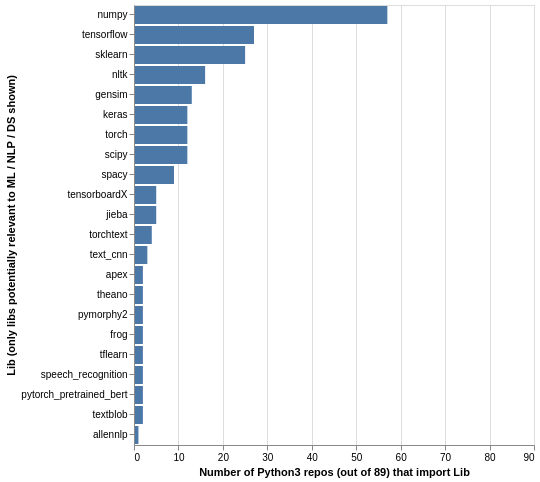

In [71]:
chart = alt.Chart(nlp_df).mark_bar().encode(
    x = alt.X('cnt', title="Number of Python3 repos (out of %s) that import Lib" % num_repos, scale=alt.Scale(domain=(0,int(num_repos)))),
    y = alt.Y('lib', title="Lib (only libs potentially relevant to ML / NLP / DS shown)", sort=alt.EncodingSortField(order="descending")),
)
chart

In [72]:
chart.save("imports.png")